# Naive Optimisation

In [1]:
import numpy as np
import scipy.optimize as opt
from scipy import stats
from plasso.helpers import model, j

import matplotlib.pyplot as graph
import seaborn as sns

from sklearn.linear_model import LassoCV

graph.style.use('fivethirtyeight')


def plot_betas(hat, ground_truth):
    graph.plot(ground_truth, 'o', alpha=0.5, label=r'$\beta^*$')
    graph.plot(hat, '.', alpha=0.8, label=r'$\hat{\beta}$')
    graph.legend()

In [2]:
# Setup
n = 100
p = 50
k = 4

beta_0 = 0
theta_0 = np.zeros(k)

beta = np.zeros(p)
beta[:4] = [2, -2, 2, 2]

theta = np.zeros((p, k))
theta[2, 0] = 2.0
theta[3, 1] = -2.0

z = stats.bernoulli(p=0.5).rvs(size=(n, k))
print(z.shape)

x = stats.norm().rvs(size=(n, p))
print(x.shape)

(100, 4)
(100, 50)


In [3]:
# Helper function for optimization
history = []
def cost_wrapper(params, x, z, y, alpha, lam):
    b0, t0 = params[0], params[1:k+1]
    b = params[k+1:k+p+1]
    t = params[k+p+1:].reshape((p, k))
    assert b.shape[0] == p
    assert t.shape[0] == p and t.shape[1] == k
    assert len(b0) + len(t0) + len(b)
    
    cost_i = j(b0, t0, b, t, x, z, y, alpha, lam)
    
    history.append(cost_i)
    return cost_i

## Lasso Equivalence Test

In [4]:
y = x @ beta + 0.5 * stats.norm().rvs(n)
print(y.shape)

(100,)


0.06287790107054887


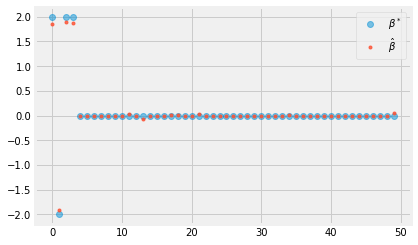

In [5]:
lasso_gt = LassoCV(cv=5).fit(x, y)

lam = lasso_gt.alpha_
print(lam)

plot_betas(lasso_gt.coef_, beta)
graph.show()

In [6]:
%%time
# Pliable Lasso
history = []
params_opt = opt.fmin(
    cost_wrapper,
    0.005 * stats.norm().rvs(1+k+p+p*k),
    (x, z, y, 0.5, 2*lam),
    maxfun=2e5
)

TypeError: object of type 'numpy.float64' has no len()

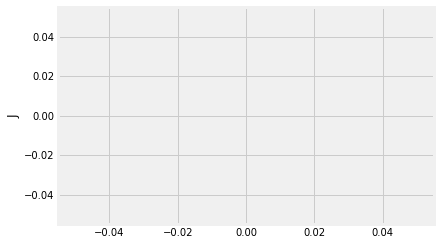

NameError: name 'params_opt' is not defined

In [7]:
graph.plot(history)
graph.ylabel('J')
graph.show()

start_betas = 1+k+1
end_betas = start_betas + p
beta_hat = params_opt[start_betas: end_betas]

plot_betas(beta_hat, beta)
graph.show()